In [ ]:
#importing the libraries

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
#reading the dataset

In [81]:
from google.colab import files
upload = files.upload()

Saving test_data.csv to test_data.csv


In [ ]:
train = pd.read_csv(r"/content/train_data.csv")

# New Section

In [ ]:
#head  of the dataset

In [ ]:
train.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,4,0,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,2,2,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,7,19,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,1,16,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,7,13,1442,1904,1958,7,5,2,1,0,0,2


In [ ]:
#tail of the dataset

In [ ]:
train.tail()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1395,1396,1100,1,1.6,0,12,0,15,0.1,112,8,14,919,1344,757,12,2,16,1,1,1,0
1396,1397,1358,0,2.5,1,0,0,20,0.6,135,7,0,1485,1655,3406,5,1,11,0,0,1,3
1397,1398,1034,1,2.7,1,6,0,37,0.7,120,7,20,707,1199,3625,17,1,12,0,1,1,3
1398,1399,703,1,2.7,0,12,1,30,0.3,113,1,20,218,1065,1472,14,7,7,1,0,0,0
1399,1400,1064,0,2.9,1,1,1,34,0.2,184,6,13,1175,1569,654,16,13,6,1,0,0,0


In [ ]:
#shape of the dataset

In [ ]:
train.shape

(1400, 22)

In [ ]:
#Data Analysis of the dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1400 non-null   int64  
 1   battery_power  1400 non-null   int64  
 2   bluetooth      1400 non-null   int64  
 3   clock_speed    1400 non-null   float64
 4   dual_sim       1400 non-null   int64  
 5   fc             1400 non-null   int64  
 6   four_g         1400 non-null   int64  
 7   int_memory     1400 non-null   int64  
 8   m_dep          1400 non-null   float64
 9   mobile_wt      1400 non-null   int64  
 10  n_cores        1400 non-null   int64  
 11  pc             1400 non-null   int64  
 12  px_height      1400 non-null   int64  
 13  px_width       1400 non-null   int64  
 14  ram            1400 non-null   int64  
 15  sc_h           1400 non-null   int64  
 16  sc_w           1400 non-null   int64  
 17  talk_time      1400 non-null   int64  
 18  three_g 

In [ ]:
#description of the dataset

In [ ]:
train.describe()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,1237.027143,0.499286,1.526071,0.505714,4.215000,0.515714,32.147143,0.505143,140.125714,4.564286,9.822143,652.376429,1244.966429,2122.869286,12.294286,5.787143,10.972143,0.756429,0.503571,0.512143,1.500000
std,404.2895,440.555073,0.500178,0.824300,0.500146,4.251417,0.499932,18.209559,0.290107,35.361221,2.279946,6.048926,447.273563,428.168423,1087.155644,4.160191,4.376048,5.546213,0.429390,0.500166,0.500031,1.118434
min,1.0000,502.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,350.7500,842.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,4.750000,283.750000,874.000000,1205.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,700.5000,1222.500000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,141.000000,5.000000,10.000000,576.000000,1247.000000,2127.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1050.2500,1615.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,958.500000,1613.000000,3049.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1400.0000,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#datavisualization part of the dataset

In [ ]:
#data visualization for Internal Memory vs Price range

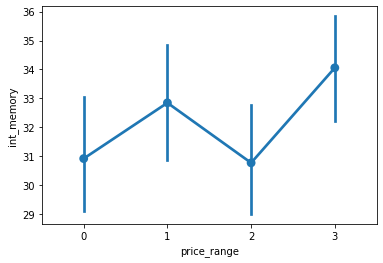

In [ ]:
sns.pointplot(y="int_memory", x="price_range", data=train)

In [ ]:
#percentage of phones which support the 3G Network

In [ ]:
labels = ["3G-supported",'Not supported']
values=train['three_g'].value_counts().values

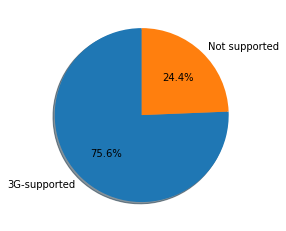

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [ ]:
#from the above image we can see that the 75.6 percentage of phones support the 3G and 24.4 will not support

In [ ]:
#percentage of the phones which support the 4G Network

In [ ]:
labels = ["4G-supported",'Not supported']
values = train['four_g'].value_counts().values

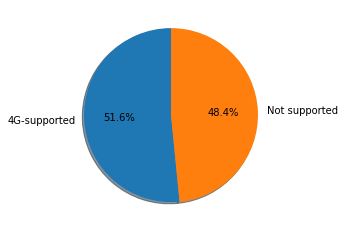

In [ ]:
fig1,ax1 = plt.subplots()
ax1.pie(values,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [ ]:
#from the above image we can see that the 51.6 percentage of phones support the 4G and 48.4 will not support

In [ ]:
#relation between battery power and price range

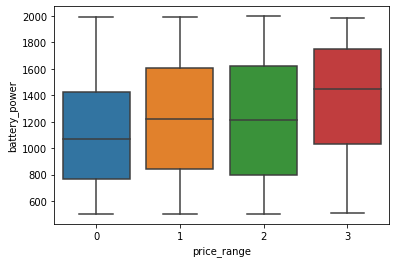

In [ ]:
sns.boxplot(x="price_range", y="battery_power", data=train)

In [ ]:
#relation between ram and price_range

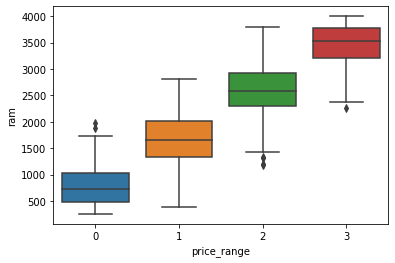

In [ ]:
sns.boxplot(x="price_range", y="ram", data=train)

In [ ]:
#relation between internal memory and price range

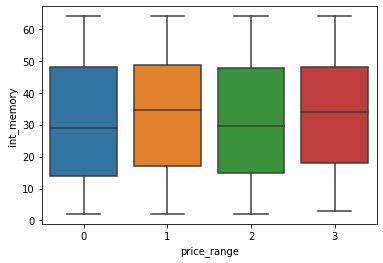

In [ ]:
sns.boxplot(x="price_range", y="int_memory", data=train)

In [ ]:
#effect of ram on the Price

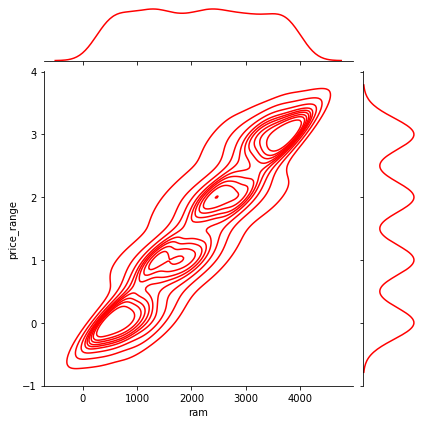

In [ ]:
sns.jointplot(x='ram',y='price_range',data=train,color='red',kind='kde');

In [ ]:
#Values for X and y array

In [ ]:
X=train.drop('price_range',axis=1)

In [ ]:
y=train['price_range']

In [ ]:
#splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#applying the Linear regression model

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
lm.score(X_test,y_test)

0.9203671072306037

In [ ]:
#now i will try to apply the decision tree model


In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree.score(X_test,y_test)

0.7952380952380952

In [ ]:
#now we will try to apply the random forest model


In [57]:
rfc = RandomForestClassifier(n_estimators=200)

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rfc.score(X_test,y_test)

0.8666666666666667

In [ ]:
#Applying KNN


In [132]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5)

In [133]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [134]:
knn.score(X_test,y_test)

0.8833333333333333

In [135]:
#from the above regression models we can say that KNN and Liner regression are perfect Models 

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8833333333333333

In [137]:
pred = knn.predict(X_test)

In [138]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       114
           1       0.84      0.89      0.86       103
           2       0.81      0.85      0.83       103
           3       0.93      0.87      0.90       100

    accuracy                           0.88       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.89      0.88      0.88       420



In [80]:
#now i will try to predict the price for test file by using KNN for Prediction

In [191]:
test = pd.read_csv(r"/content/test_data.csv")

In [107]:
#Header of the files

In [192]:
test.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1401,1572,1,0.8,1,7,1,8,0.8,169,5,8,577,1237,3461,6,3,10,1,1,1
1,1402,707,0,2.1,1,2,0,25,0.8,131,3,17,495,574,3838,9,2,7,1,0,1
2,1403,983,0,0.6,1,0,1,45,0.1,130,4,11,948,1205,2052,5,3,6,1,0,1
3,1404,827,1,0.6,1,9,1,35,0.2,87,6,17,23,826,2367,5,3,15,1,0,1
4,1405,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1


In [97]:
#lower part of the file

In [193]:
test.tail()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
595,1996,707,0,0.5,0,0,1,16,0.1,194,2,0,1027,1508,1853,17,14,12,1,1,1
596,1997,888,0,2.6,1,2,1,33,0.4,198,2,17,327,1683,3407,12,1,20,1,0,0
597,1998,1130,0,1.8,1,0,0,27,0.9,101,1,8,1495,1579,315,14,5,11,1,1,0
598,1999,837,0,2.4,1,1,0,51,0.2,104,5,15,638,1831,594,16,6,20,1,0,1
599,2000,1866,0,1.4,0,0,0,30,0.5,182,3,0,108,1781,3834,16,11,8,0,0,0


In [194]:
test.shape

(600, 21)

In [196]:
predicted_price=knn.predict(test)

In [197]:
predicted_price

array([3, 3, 1, 1, 3, 2, 0, 0, 2, 3, 1, 1, 0, 1, 0, 2, 3, 1, 3, 2, 3, 2,
       2, 0, 3, 2, 1, 3, 2, 3, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 3,
       0, 2, 3, 3, 2, 3, 1, 0, 0, 2, 0, 3, 1, 2, 2, 3, 3, 1, 1, 3, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 0, 2, 0, 2, 1, 3, 0, 2, 0, 2,
       3, 2, 1, 2, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 1, 1, 1, 3, 1, 2, 3, 2,
       0, 1, 0, 2, 1, 3, 1, 0, 3, 1, 2, 1, 1, 0, 1, 1, 1, 3, 0, 0, 3, 2,
       0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 3, 2, 0, 3, 2, 0, 3, 1, 2, 3,
       2, 1, 0, 3, 1, 1, 3, 1, 0, 3, 0, 0, 3, 1, 0, 2, 2, 2, 0, 1, 2, 2,
       0, 1, 1, 1, 3, 0, 1, 3, 2, 2, 0, 3, 3, 1, 0, 2, 2, 0, 3, 2, 0, 1,
       2, 3, 0, 2, 1, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 1, 2, 2, 1, 2, 2,
       3, 0, 2, 2, 2, 1, 2, 3, 0, 2, 1, 0, 2, 2, 3, 1, 3, 0, 1, 3, 1, 2,
       0, 1, 3, 0, 0, 2, 3, 0, 3, 0, 2, 0, 2, 3, 3, 0, 1, 3, 1, 0, 2, 0,
       3, 2, 2, 2, 2, 2, 1, 3, 3, 2, 1, 3, 0, 3, 2, 2, 3, 2, 1, 3, 3, 1,
       0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2,

In [198]:
test['price_range']=predicted_price


In [199]:
test

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1401,1572,1,0.8,1,7,1,8,0.8,169,5,8,577,1237,3461,6,3,10,1,1,1,3
1,1402,707,0,2.1,1,2,0,25,0.8,131,3,17,495,574,3838,9,2,7,1,0,1,3
2,1403,983,0,0.6,1,0,1,45,0.1,130,4,11,948,1205,2052,5,3,6,1,0,1,1
3,1404,827,1,0.6,1,9,1,35,0.2,87,6,17,23,826,2367,5,3,15,1,0,1,1
4,1405,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1996,707,0,0.5,0,0,1,16,0.1,194,2,0,1027,1508,1853,17,14,12,1,1,1,2
596,1997,888,0,2.6,1,2,1,33,0.4,198,2,17,327,1683,3407,12,1,20,1,0,0,3
597,1998,1130,0,1.8,1,0,0,27,0.9,101,1,8,1495,1579,315,14,5,11,1,1,0,0
598,1999,837,0,2.4,1,1,0,51,0.2,104,5,15,638,1831,594,16,6,20,1,0,1,0
